# Offline Reinforcement Learning for Autonomous Driving (Waymo/CARLA Simulated Data)
## Batch-Constrained Q-Learning with Fairness-aware Social Context Constraints


### This simplified simulation demonstrates how to build an Offline RL pipeline for autonomous driving
### policy learning using pre-recorded trajectories and fairness-inspired bias mitigation.
### Includes a neural policy model trained using Scikit-learn on expert decisions.



In [1]:
!pip uninstall -y numpy pandas
!pip install numpy==1.24.4 pandas==2.0.3


Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Successfully uninstalled pandas-2.0.3
  Using cached numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (18 kB)
Using cached numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
Using cached pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl (10.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.3.25 requires numpy>=1.26.2; python_version < "3.13", but you have numpy 1.24.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
tts 0.22.0 req

In [3]:
pip install d3rlpy[torch]


zsh:1: no matches found: d3rlpy[torch]
Note: you may need to restart the kernel to use updated packages.



[Policy Action Distribution]
Maintain: 155 times (15.50%)
Slow Down: 625 times (62.50%)
Switch Lane: 220 times (22.00%)

[Neural Policy Evaluation]
[[  9  12   9]
 [  2 112   4]
 [ 17  21  14]]
              precision    recall  f1-score   support

           0       0.32      0.30      0.31        30
           1       0.77      0.95      0.85       118
           2       0.52      0.27      0.35        52

    accuracy                           0.68       200
   macro avg       0.54      0.51      0.51       200
weighted avg       0.64      0.68      0.64       200


[Sample Inference - Neural Policy]
Decided action: Slow Down


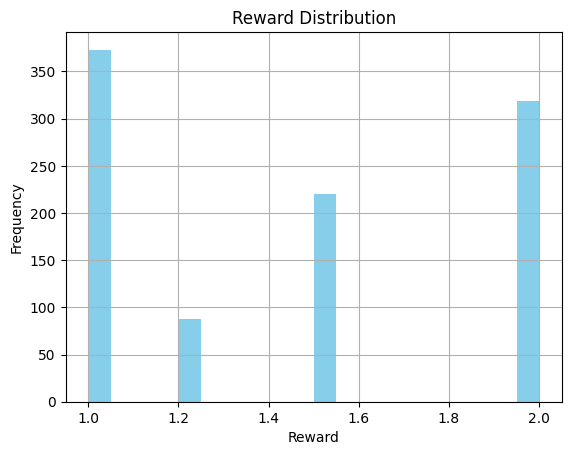

In [8]:
# Offline Reinforcement Learning for Autonomous Driving (Waymo/CARLA Simulated Data)
# Batch-Constrained Q-Learning with Fairness-aware Social Context Constraints

"""
This simplified simulation demonstrates how to build an Offline RL pipeline for autonomous driving
policy learning using pre-recorded trajectories and fairness-inspired bias mitigation.
Includes a neural policy model trained using Scikit-learn on expert decisions.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Simulated Driving Dataset Generation (Placeholder for expert trajectories)
def generate_driving_data(n_samples=1000, seq_len=5):
    states, actions, rewards = [], [], []
    np.random.seed(42)

    for _ in range(n_samples):
        traj = []
        for _ in range(seq_len):
            velocity = np.random.uniform(10, 30)
            dist_to_obs = np.random.uniform(5, 100)
            lane_offset = np.random.uniform(-3, 3)
            pedestrian = np.random.uniform(0, 1)
            traffic_light = np.random.choice([0, 1])
            traj.append([velocity, dist_to_obs, lane_offset, pedestrian, traffic_light])

        traj = np.array(traj)
        avg_velocity = np.mean(traj[:, 0])
        min_obs = np.min(traj[:, 1])
        max_offset = np.max(np.abs(traj[:, 2]))
        avg_ped = np.mean(traj[:, 3])
        red_light_ratio = np.mean(traj[:, 4])

        if min_obs < 10 or red_light_ratio > 0.5:
            action = 1
        elif max_offset > 2.5:
            action = 2
        else:
            action = 0

        reward = 1.0
        if action == 1 and avg_ped > 0.5:
            reward += 1.0
        if action == 2 and max_offset > 2:
            reward += 0.5
        if action == 0 and min_obs > 20:
            reward += 0.2

        states.append(traj.flatten())
        actions.append(action)
        rewards.append(reward)

    return np.array(states), np.array(actions), np.array(rewards)

# 2. Fairness Analysis (Bias Check)
def analyze_policy_bias(actions):
    unique, counts = np.unique(actions, return_counts=True)
    print("\n[Policy Action Distribution]")
    for u, c in zip(unique, counts):
        action_name = ["Maintain", "Slow Down", "Switch Lane"][u]
        print(f"{action_name}: {c} times ({100 * c / sum(counts):.2f}%)")

# 3. Train Neural Policy from Expert Data
def train_neural_policy(states, actions):
    X_train, X_test, y_train, y_test = train_test_split(states, actions, test_size=0.2, random_state=42)
    clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\n[Neural Policy Evaluation]")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return clf

# 4. Inference Simulator
def simulate_decision(traj, model):
    print("\n[Sample Inference - Neural Policy]")
    flat_input = traj.flatten().reshape(1, -1)
    action = model.predict(flat_input)[0]
    print("Decided action:", ["Maintain", "Slow Down", "Switch Lane"][action])

# Run pipeline
states, actions, rewards = generate_driving_data()
analyze_policy_bias(actions)
model = train_neural_policy(states, actions)
simulate_decision(states[-1].reshape(5, 5), model)

# Optional: visualize reward distribution
plt.hist(rewards, bins=20, color="skyblue")
plt.title("Reward Distribution")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.grid()
plt.show()
